In [ ]:
!pip install prophet
from prophet import Prophet
import pandas as pd
import numpy as np
import missingno as msn
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.ticker import MultipleLocator
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import joblib

In [ ]:
df = pd.read_csv("/content/2020_H2_Resident_ENG.csv")
df.head()

,district,transaction type,land shifting total area,transaction year,num_building,num_land,num_garage,total floor number,building state,main building materials,...,carpark type,carpark shifting area,carpark total price,main building area,subsidiary building area,balcony area,elevator,total ntd,House Price,complete year
0,Wenshan District,Land+Building,1261.30,108,1,3,0,1.0,House,Reinforced Concrete,...,No carpark,0.0,0,245.48,0.00,0.00,0,523060000,2130764,NaN
1,ZhongZheng District,Land+Building,36.00,109,1,2,0,5.0,Apartment_5storey,Reinforced Concrete,...,No carpark,0.0,0,106.57,4.81,16.47,0,18500000,130273,76.0
2,ZhongZheng District,Land+Building,19.39,109,1,2,0,7.0,Apartment_5to10storey,Reinforced Concrete,...,No carpark,0.0,0,50.17,0.00,5.05,1,21580000,253972,102.0
3,ZhongZheng District,Land+Building,10.66,109,1,1,0,5.0,Apartment_5storey,Strengthened Brickwork,...,No carpark,0.0,0,33.00,1.63,0.00,0,10400000,300318,NaN
4,ZhongZheng District,Land+Building,45.00,109,1,1,0,4.0,Apartment_5storey,Strengthened Brickwork,...,No carpark,0.0,0,99.86,0.00,0.00,0,35800000,358502,58.0


In [ ]:
df.info

<bound method DataFrame.info of                  district transaction type  land shifting total area  \
0        Wenshan District    Land+Building                   1261.30   
1     ZhongZheng District    Land+Building                     36.00   
2     ZhongZheng District    Land+Building                     19.39   
3     ZhongZheng District    Land+Building                     10.66   
4     ZhongZheng District    Land+Building                     45.00   
...                   ...              ...                       ...   
9808     Wenshan District    Land+Building                     15.78   
9809     Wenshan District    Land+Building                     10.57   
9810     Wenshan District    Land+Building                     13.78   
9811     Wenshan District    Land+Building                     24.12   
9812  ZhongZheng District    Land+Building                     28.03   

      transaction year  num_building  num_land  num_garage  \
0                  108             1     

In [ ]:
df.drop([ 'main building materials', 'construction to complete the years', 'complete year', 'building state'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['district', 'transaction type', 'land shifting total area',
       'transaction year', 'num_building', 'num_land', 'num_garage',
       'total floor number', 'building shifting total area', 'num_room',
       'num_bathroom', 'compartment', 'management org', 'carpark type',
       'carpark shifting area', 'carpark total price', 'main building area',
       'subsidiary building area', 'balcony area', 'elevator', 'total ntd',
       'House Price'],
      dtype='object')

In [ ]:
nan_values = df.isna()

any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()


for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Column '{column}' has {count} missing values.")

print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

print("\nMissing Values in Each Column?")
print(any_missing_values_in_column)

print("\nMissing Value Counts in Each Column:")
print(missing_value_count)

-----> Column 'total floor number' has 18 missing values.

Missing Values in the Entire DataFrame?
True

Missing Values in Each Column?
district                        False
transaction type                False
land shifting total area        False
transaction year                False
num_building                    False
num_land                        False
num_garage                      False
total floor number               True
building shifting total area    False
num_room                        False
num_bathroom                    False
compartment                     False
management org                  False
carpark type                    False
carpark shifting area           False
carpark total price             False
main building area              False
subsidiary building area        False
balcony area                    False
elevator                        False
total ntd                       False
House Price                     False
dtype: bool

Missing Value C

In [ ]:
df=df.dropna()


In [ ]:
nan_values = df.isna()

any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()


for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Column '{column}' has {count} missing values.")

print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

print("\nMissing Values in Each Column?")
print(any_missing_values_in_column)

print("\nMissing Value Counts in Each Column:")
print(missing_value_count)


Missing Values in the Entire DataFrame?
False

Missing Values in Each Column?
district                        False
transaction type                False
land shifting total area        False
transaction year                False
num_building                    False
num_land                        False
num_garage                      False
total floor number              False
building shifting total area    False
num_room                        False
num_bathroom                    False
compartment                     False
management org                  False
carpark type                    False
carpark shifting area           False
carpark total price             False
main building area              False
subsidiary building area        False
balcony area                    False
elevator                        False
total ntd                       False
House Price                     False
dtype: bool

Missing Value Counts in Each Column:
district                        0
t

Text(0.5, 1.0, 'carpark shifting area')

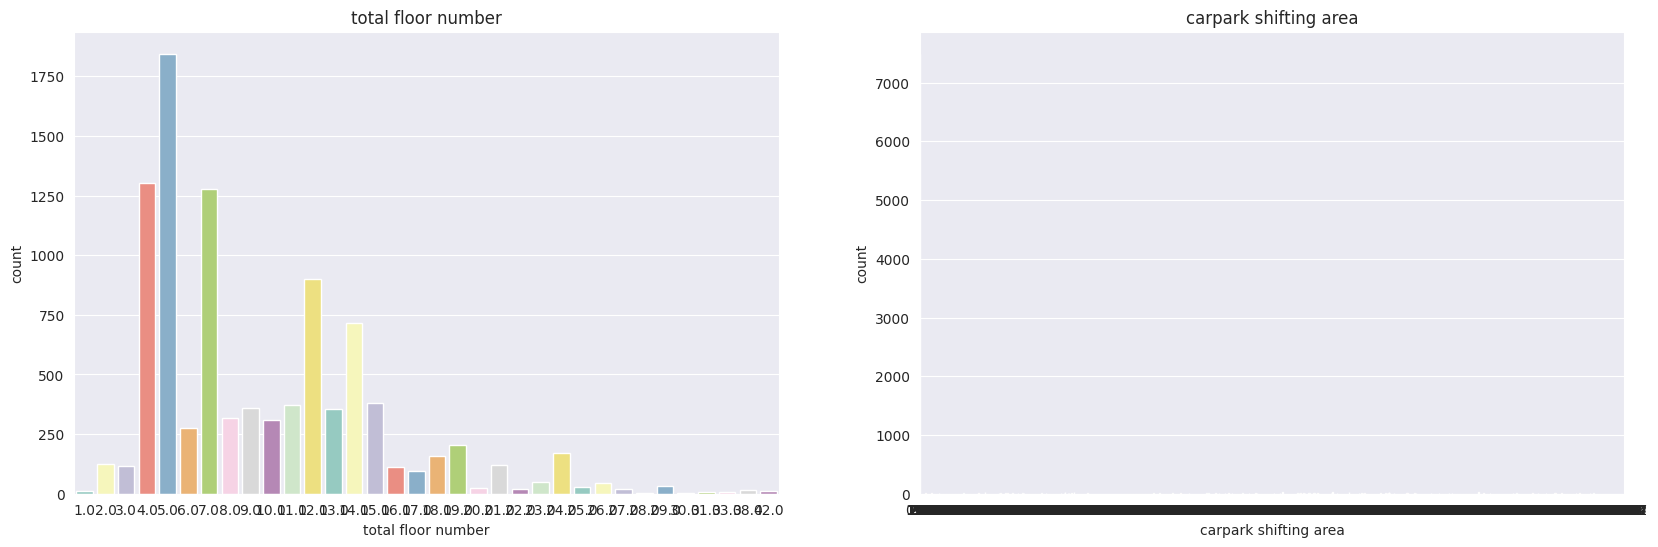

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2 , 1)
sns.countplot(x='total floor number', data=df, palette='Set3')
plt.title('total floor number')

plt.subplot(1, 2 , 2)
sns.countplot(x='carpark shifting area', data=df, palette='Set2')
plt.title('carpark shifting area')

<ipython-input-102-93b6d6d47ff5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = df.corr()


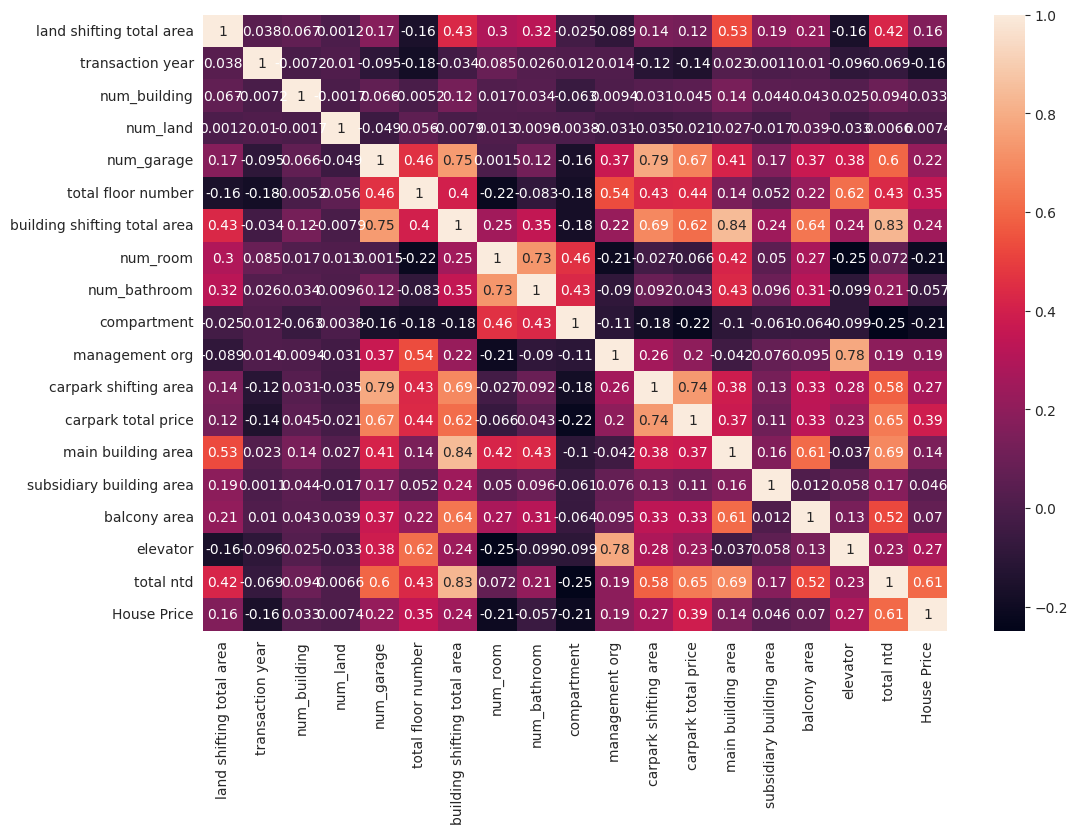

In [ ]:
matrix_corr = df.corr()
figure = plt.figure(figsize=(12, 8))
sns.heatmap(matrix_corr, annot=True)
plt.show()

<Axes: >

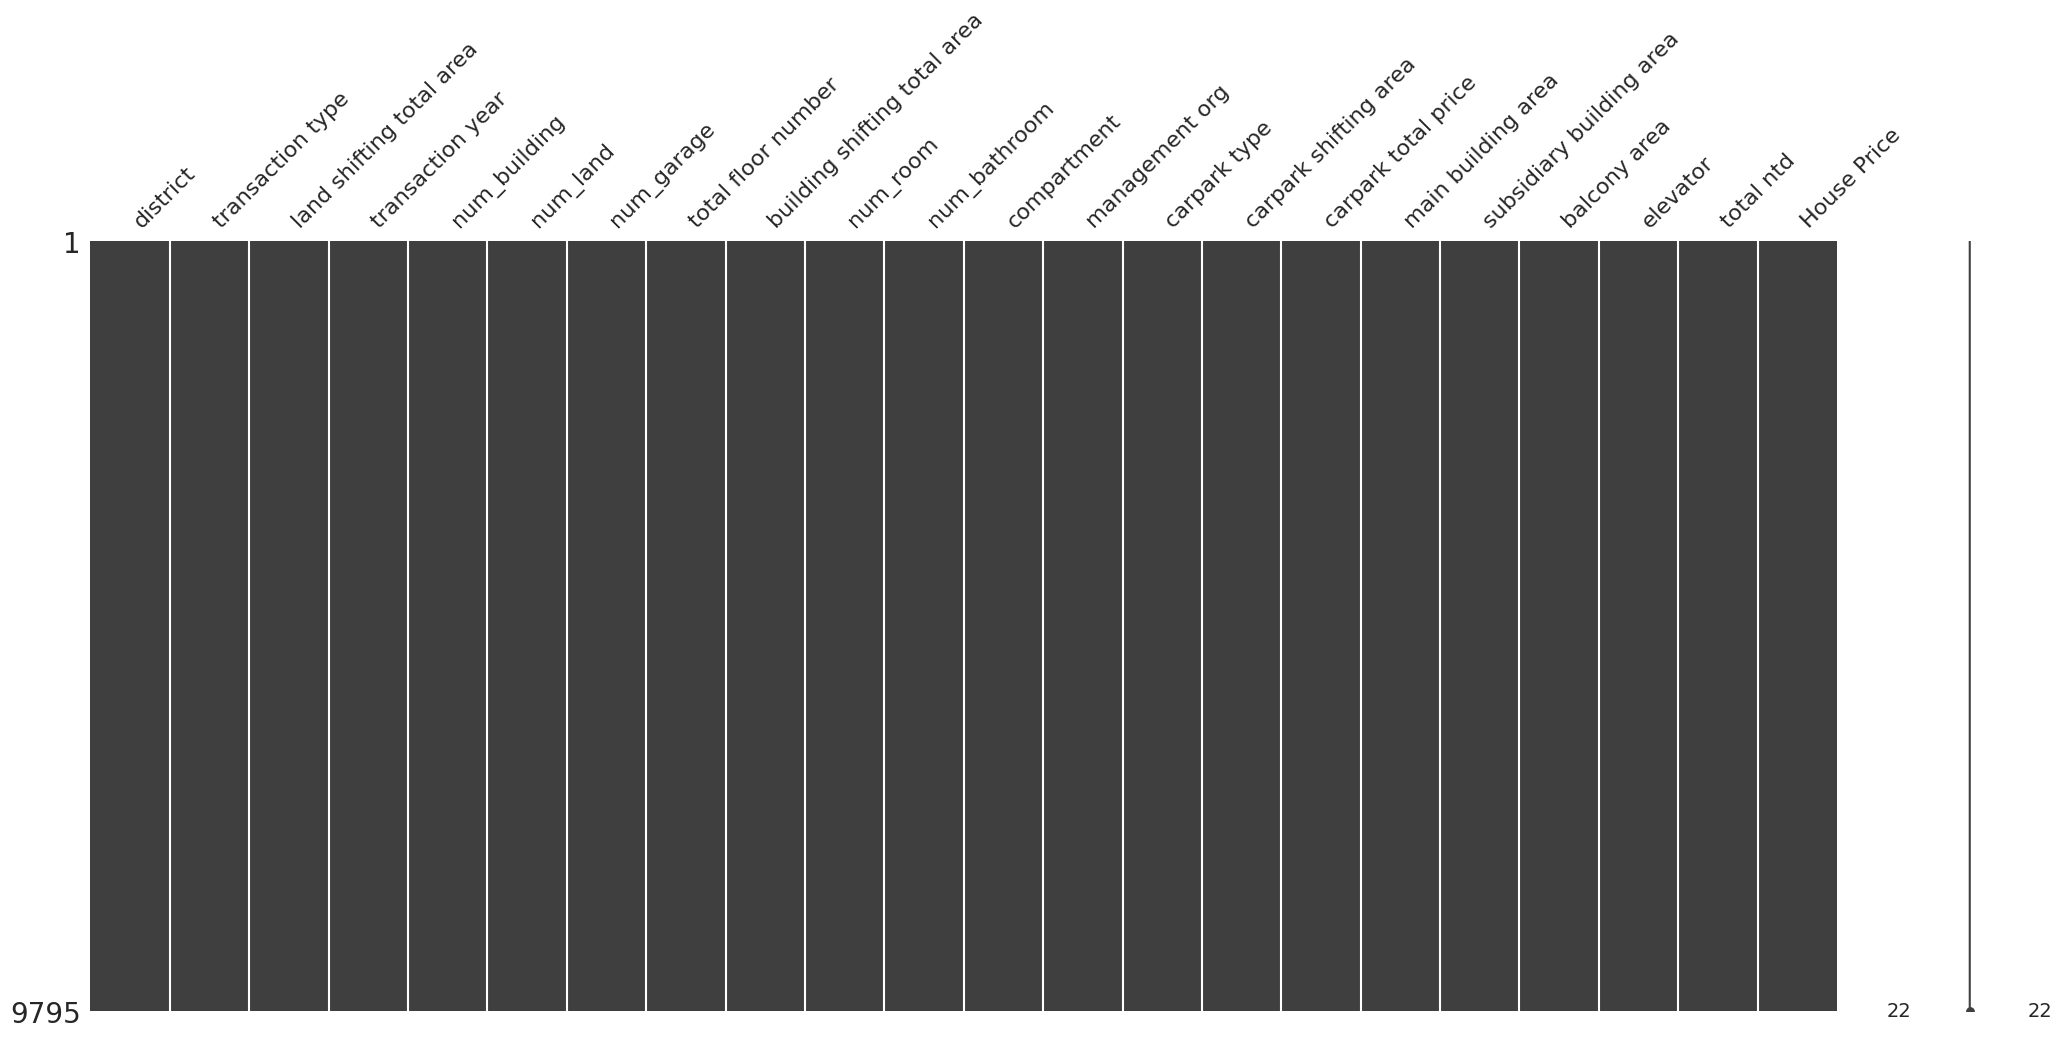

In [ ]:
msn.matrix(df)

In [ ]:
df.isna().sum()

district                        0
transaction type                0
land shifting total area        0
transaction year                0
num_building                    0
num_land                        0
num_garage                      0
total floor number              0
building shifting total area    0
num_room                        0
num_bathroom                    0
compartment                     0
management org                  0
carpark type                    0
carpark shifting area           0
carpark total price             0
main building area              0
subsidiary building area        0
balcony area                    0
elevator                        0
total ntd                       0
House Price                     0
dtype: int64

In [ ]:
df.groupby(by=["district"]).mean()

<ipython-input-105-96e5103cadbf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=["district"]).mean()


,land shifting total area,transaction year,num_building,num_land,num_garage,total floor number,building shifting total area,num_room,num_bathroom,compartment,management org,carpark shifting area,carpark total price,main building area,subsidiary building area,balcony area,elevator,total ntd,House Price
district,,,,,,,,,,,,,,,,,,,
Beitou District,34.844572,108.968401,1.028810,1.403346,0.521375,8.507435,140.214591,2.618959,1.684015,0.959108,0.600372,12.354061,585520.446097,86.436422,3.860056,8.684275,0.612454,2.060484e+07,146477.894052
Daan District,22.102010,108.762376,1.042574,1.544554,0.394059,11.404950,137.948832,2.495050,1.660396,0.942574,0.684158,8.436089,780688.118812,90.037030,3.112356,9.323485,0.814851,3.867721e+07,273917.690099
Datong District,16.782568,108.943182,1.013636,1.593182,0.504545,10.911364,112.915295,2.259091,1.418182,0.927273,0.702273,10.993750,579340.909091,67.626409,2.150591,6.705659,0.786364,2.000048e+07,181803.827273
Nangang District,31.731405,108.990476,1.021429,1.288095,0.695238,9.433333,150.137881,2.738095,1.730952,0.957143,0.630952,17.518476,547857.142857,86.486167,3.829786,8.739357,0.638095,2.609968e+07,175514.235714
Neihu District,32.565497,108.986446,1.023343,1.274849,0.638554,9.368976,142.764752,2.577560,1.668675,0.951807,0.704066,13.113223,726475.903614,83.904495,3.759413,8.944443,0.668675,2.556694e+07,178263.025602
Shilin District,39.611382,108.883770,1.039791,1.329843,0.484817,8.417801,146.245937,2.700524,1.732984,0.906806,0.525654,11.383298,831089.005236,96.606241,3.452471,9.391770,0.569634,2.942325e+07,186991.959162
Songshan District,24.607026,108.993043,1.024348,1.438261,0.151304,8.280000,109.695043,2.532174,1.589565,0.973913,0.542609,1.796852,88347.826087,84.378278,2.130974,7.472504,0.622609,2.318299e+07,212003.142609
Wanhua District,17.212702,108.814516,1.025538,1.356183,0.401882,12.346774,101.197191,2.235215,1.317204,0.963710,0.596774,8.850860,493602.150538,62.425632,2.083992,5.477661,0.716398,1.475856e+07,148630.706989
Wenshan District,37.523754,108.995722,1.024599,1.563636,0.485561,8.652406,127.553027,2.744385,1.674866,0.977540,0.634225,8.554289,254716.577540,77.235701,3.955829,7.813198,0.608556,1.783298e+07,142948.213904


In [ ]:
df["district"].unique()

array(['Wenshan District', 'ZhongZheng District', 'Wanhua District',
       'Neihu District', 'Zhongshan District', 'Songshan District',
       'Xinyi District', 'Nangang District', 'Beitou District',
       'Shilin District', 'Daan District', 'Datong District'],
      dtype=object)

In [ ]:
dis_counts=df['district'].value_counts()

In [ ]:
dis_counts

Neihu District         1328
Zhongshan District     1257
Beitou District        1076
Daan District          1010
Shilin District         955
Wenshan District        935
Wanhua District         744
Xinyi District          683
Songshan District       575
Datong District         440
Nangang District        420
ZhongZheng District     372
Name: district, dtype: int64

In [ ]:
def apply_filter_to_column(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    threshold_multiplier = 3.0

    lower_bound = Q1 - threshold_multiplier * IQR
    upper_bound = Q3 + threshold_multiplier * IQR

    filtered_column = df[column].apply(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else None)
    return filtered_column

data_to_filter = ['House Price', 'total floor number', 'main building area', 'subsidiary building area', 'balcony area']


df_copy = df.copy()

for column in data_to_filter:
    filtered_column = apply_filter_to_column(column)
    df_copy[f'{column}_filtered'] = filtered_column


df_copy = df_copy.dropna(how='all', subset=[f'{column}_filtered' for column in data_to_filter])

filtered_columns = df_copy.columns.tolist()

print(filtered_columns)

['district', 'transaction type', 'land shifting total area', 'transaction year', 'num_building', 'num_land', 'num_garage', 'total floor number', 'building shifting total area', 'num_room', 'num_bathroom', 'compartment', 'management org', 'carpark type', 'carpark shifting area', 'carpark total price', 'main building area', 'subsidiary building area', 'balcony area', 'elevator', 'total ntd', 'House Price', 'House Price_filtered', 'total floor number_filtered', 'main building area_filtered', 'subsidiary building area_filtered', 'balcony area_filtered']


<Figure size 600x600 with 0 Axes>

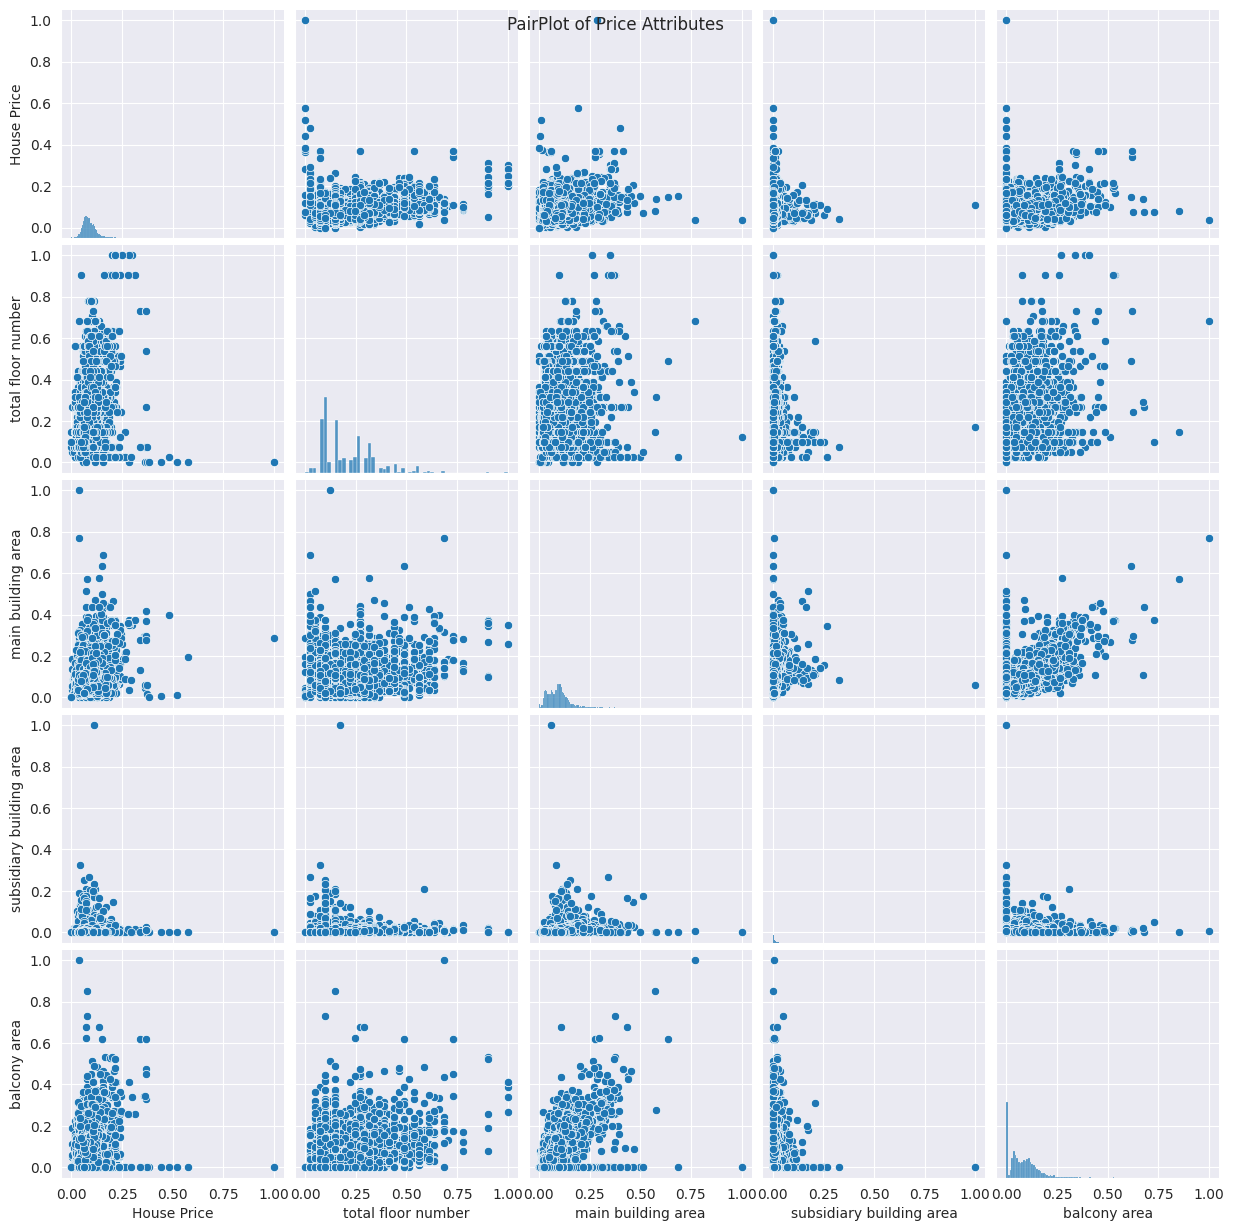

In [ ]:
data_to_plot = ['House Price', 'total floor number', 'main building area', 'subsidiary building area', 'balcony area']
if df_copy is not None and not df_copy.empty:
    scaler = MinMaxScaler()
    df_copy = scaler.fit_transform(df_copy[data_to_plot])
    df_copy = pd.DataFrame(df_copy, columns=data_to_plot)
    plt.figure(figsize=(6, 6))
    sns.pairplot(df_copy)
    plt.suptitle('PairPlot of Price Attributes')
    plt.show()

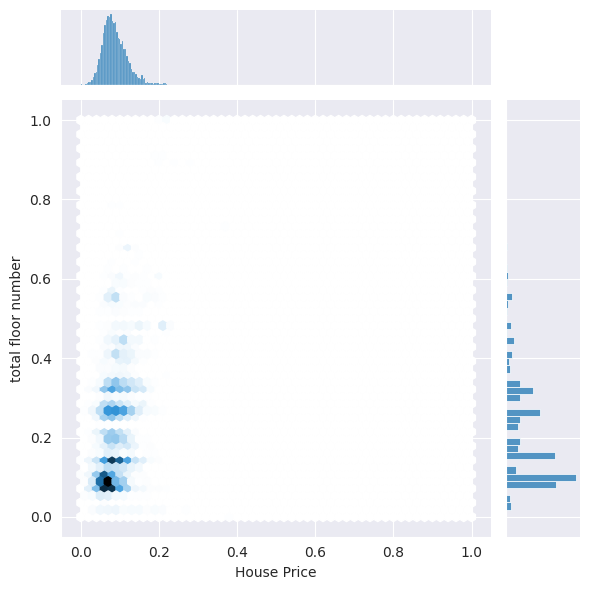

In [ ]:
sns.jointplot(data=df_copy, x='House Price', y='total floor number', kind = "hex", dropna=True)

In [ ]:
df_x = df_copy['House Price'].to_numpy()
df_y = df_copy['total floor number'].to_numpy()

indexes_to_remove = np.where(df_y == 0)[0]
df_y = np.delete(df_y, indexes_to_remove)
df_x = np.delete(df_x, indexes_to_remove)

df_copy.dropna(subset=['House Price', 'total floor number'], inplace=True)
if df_copy[['House Price', 'total floor number']].isna().any().any():
    print("There are still NaN values in the data.")
else:
    print("No NaN values found, proceed with model training.")

No NaN values found, proceed with model training.


In [ ]:
df_x = df_x.reshape(-1, 1)
dx_y = df_y.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (7825, 1)
y_train shape: (7825,)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.015961926511828955
R-squared: 0.179350861460293


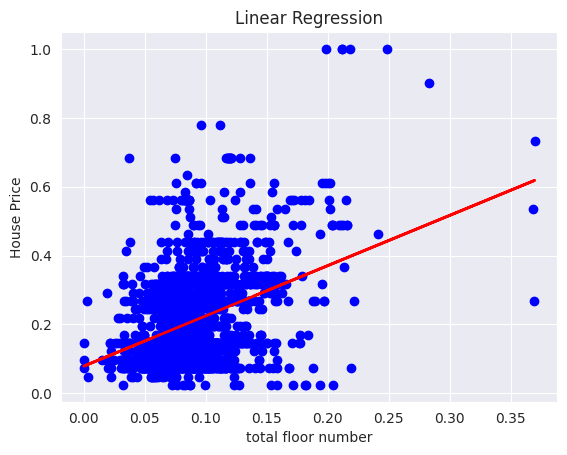

In [ ]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('total floor number')
plt.ylabel('House Price')
plt.title('Linear Regression')
plt.show()

In [ ]:
joblib.dump(model, 'linear_regression.pkl')

['linear_regression.pkl']

In [ ]:
model = joblib.load('linear_regression.pkl')
data_test = pd.DataFrame({'sqft_living': [0.6, 0.2, 1]})
predictions = model.predict(data_test)
print(predictions)

[0.95475397 0.37091122 1.53859671]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Applying on another two variable

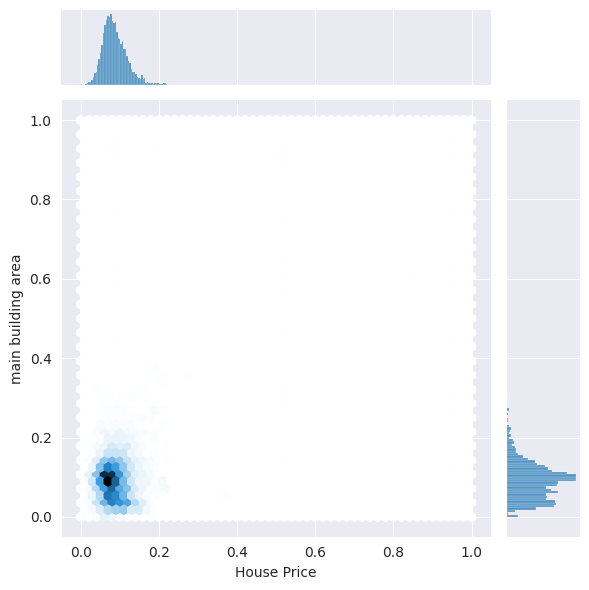

In [ ]:
sns.jointplot(data=df_copy, x='House Price', y='main building area', kind = "hex", dropna=True)

In [ ]:
df_x = df_copy['House Price'].to_numpy()
df_y = df_copy['main building area'].to_numpy()

indexes_to_remove = np.where(df_y == 0)[0]
df_y = np.delete(df_y, indexes_to_remove)
df_x = np.delete(df_x, indexes_to_remove)

df_copy.dropna(subset=['House Price', 'main building area'], inplace=True)
if df_copy[['House Price', 'main building area']].isna().any().any():
    print("There are still NaN values in the data.")
else:
    print("No NaN values found, proceed with model training.")

No NaN values found, proceed with model training.


In [ ]:
df_x = df_x.reshape(-1, 1)
dx_y = df_y.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (7763, 1)
y_train shape: (7763,)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0026766643747426267
R-squared: 0.012084743349997651


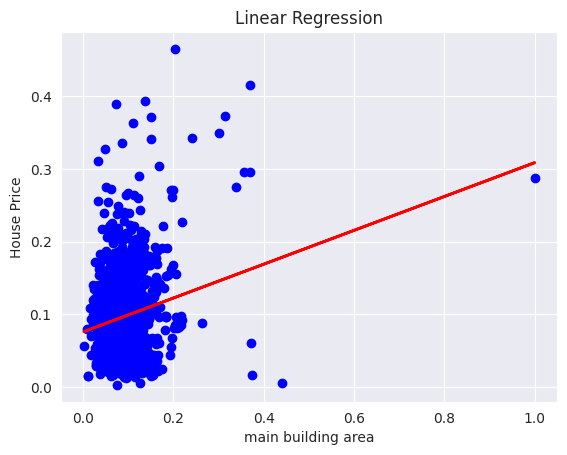

In [ ]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('main building area')
plt.ylabel('House Price')
plt.title('Linear Regression')
plt.show()

In [ ]:
joblib.dump(model, 'linear_regression.pkl')

['linear_regression.pkl']

In [ ]:
model = joblib.load('linear_regression.pkl')
data_test = pd.DataFrame({'sqft_living': [0.6, 0.2, 1]})
predictions = model.predict(data_test)
print(predictions)

[0.21568072 0.12255098 0.30881047]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
